<a href="https://colab.research.google.com/github/woodstone10/data_visualization-python/blob/main/Stock_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stock price visualization


Reference:

https://www.learndatasci.com/tutorials/python-finance-part-yahoo-finance-api-pandas-matplotlib/

https://pythonprogramming.net/getting-stock-prices-python-programming-for-finance/

https://towardsdatascience.com/trading-toolbox-04-subplots-f6c353278f78

https://github.com/matplotlib/mplfinance/blob/master/examples/styles.ipynb

In [3]:
pip install mplfinance

     |████████████████████████████████| 61kB 3.8MB/s 


In [141]:
import numpy as np
import datetime as dt
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import style
import mplfinance as mpf

**Pandas Remote Data Access**, which is simpler than web crawling

https://pandas-datareader.readthedocs.io/en/latest/remote_data.html

---



In [222]:
span = 90 # days agp
end = dt.datetime.now()
#start = dt.datetime(2021, 1, 1)
start = end - dt.timedelta(days=span) 

#yahoo = pdr.data.DataReader("TSLA", 'yahoo', start, end)
SSE = pdr.data.DataReader('005930', 'naver', start, end).astype(float) 
LGE = pdr.data.DataReader('066570', 'naver', start, end).astype(float) 
NAVER = pdr.data.DataReader('035420', 'naver', start, end).astype(float) 
KAKAO = pdr.data.DataReader('035720', 'naver', start, end).astype(float)

In [171]:
SSE.head()

,Open,High,Low,Close,Volume
Date,,,,,
2021-01-04,81000.0,84400.0,80200.0,83000.0,38655276.0
2021-01-05,81600.0,83900.0,81600.0,83900.0,35335669.0
2021-01-06,83300.0,84500.0,82100.0,82200.0,42089013.0
2021-01-07,82800.0,84200.0,82700.0,82900.0,32644642.0
2021-01-08,83300.0,90000.0,83000.0,88800.0,59013307.0


In [172]:
SSE.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2021-03-25,81000.0,82100.0,80800.0,81200.0,14758826.0
2021-03-26,81400.0,81600.0,81000.0,81500.0,12845778.0
2021-03-29,81700.0,81700.0,81000.0,81600.0,14952134.0
2021-03-30,81600.0,82300.0,81300.0,82200.0,13121698.0
2021-03-31,82400.0,82700.0,81900.0,82100.0,7659122.0


In [253]:
df.filter(['Open', 'High', 'Low', 'Close']).min().min()

80200.0

**matplotlib**

---



In [281]:
def StockPlt(df, title, buying, buying_date, selling):
  plt.rcParams['figure.figsize'] = [14,7]
  ax = plt.subplot2grid((4,1), (0,0), rowspan=3, colspan=1)
  av = plt.subplot2grid((4,1), (3,0), rowspan=1, colspan=1, sharex=ax)  
  ax.plot(df.index, df['High'], color='gray', label='High', linestyle='--')
  ax.plot(df.index, df['Close'], color='black', label='Close', linestyle='-')
  ax.plot(df.index, df['Low'], color='lightgray', label='Low', linestyle=':')
  ax.hlines(buying, start, end, color='blue', alpha=0.5 )
  ax.text(buying_date, buying*1.005, 'buying', color='blue')
  ymin = df.filter(['Open', 'High', 'Low', 'Close']).min().min()
  ax.vlines(buying_date, ymin, buying, color='blue', alpha=0.5)
  target_selling = buying * (1 + selling)
  ax.hlines(target_selling, start, end, color='red', alpha=0.5)
  ax.text(end-dt.timedelta(days=span/2), target_selling*0.99, 'target selling', color='red')
  ax.legend()
  ax.set_title(title, size=10)
  av.bar(df.index, df['Volume'], color='gray')

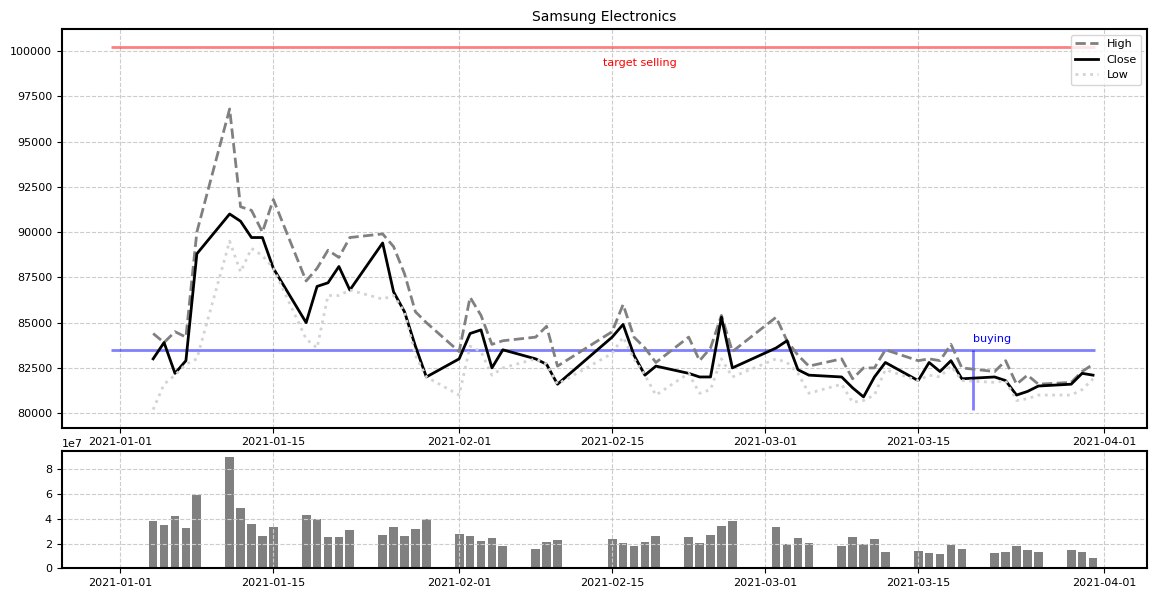

In [282]:
StockPlt(SSE,'Samsung Electronics', 83500, dt.datetime(2021, 3, 20), 0.2)

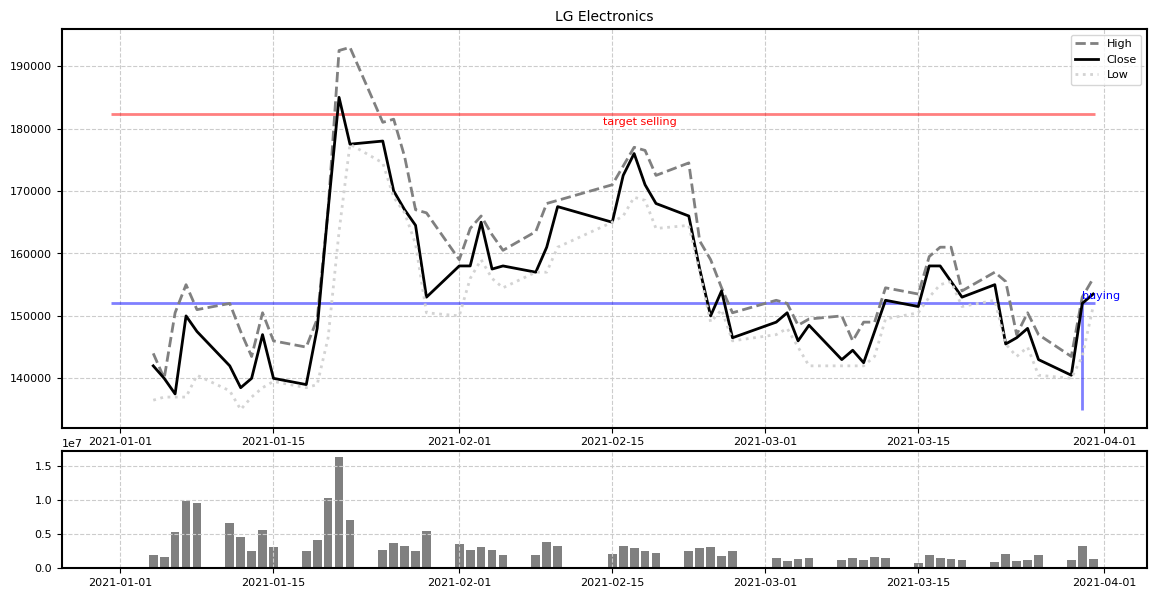

In [283]:
StockPlt(LGE,'LG Electronics', 152000, dt.datetime(2021, 3, 30), 0.2)

**matplotlib finance (mplfinance)**
- candlestick chart instead of line chart with 
- moving average value (3, 6, 9) days


---



In [ ]:
mpf.available_styles()

In [345]:
def StockMpf(df, title):
  mpf_style = mpf.make_mpf_style(base_mpf_style='yahoo', rc={'font.size': 8})
  fig = mpf.figure(figsize=(14, 7), style=mpf_style) 
  ax = fig.add_subplot(2,1,1) 
  av = fig.add_subplot(2,1,2, sharex=ax)  
  ax.set_title(title, size=10)
  mpf.plot(df, 
           type='candle',
           ax=ax,  
           volume=av,        
           mav=(3,6,9),
           show_nontrading=True         
           )

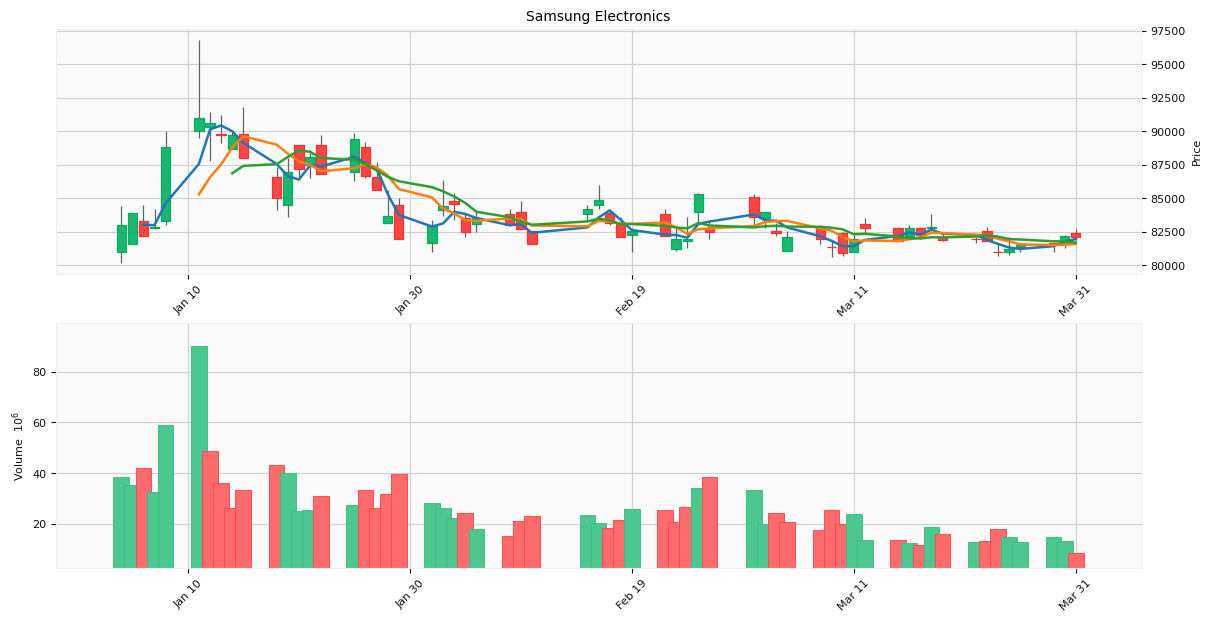

In [346]:
StockMpf(SSE,'Samsung Electronics')

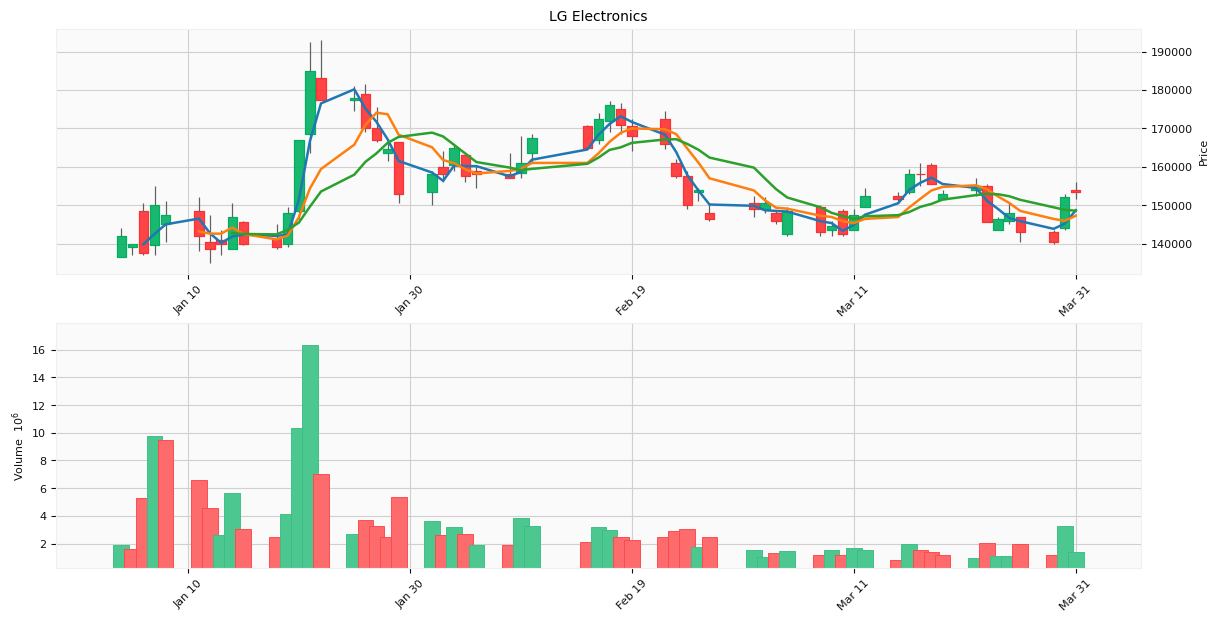

In [347]:
StockMpf(LGE,'LG Electronics')

In [293]:
def StockMpf_Classic(df, title):
  mpf_style = mpf.make_mpf_style(base_mpf_style='classic', rc={'font.size': 8})
  fig = mpf.figure(figsize=(14, 7), style=mpf_style) 
  ax = fig.add_subplot(2,1,1) 
  av = fig.add_subplot(2,1,2, sharex=ax)  
  ax.set_title(title, size=10)
  mpf.plot(df, type='candle',
          ax=ax,  
          volume=av,        
          mav=(3,6,9)         
          )

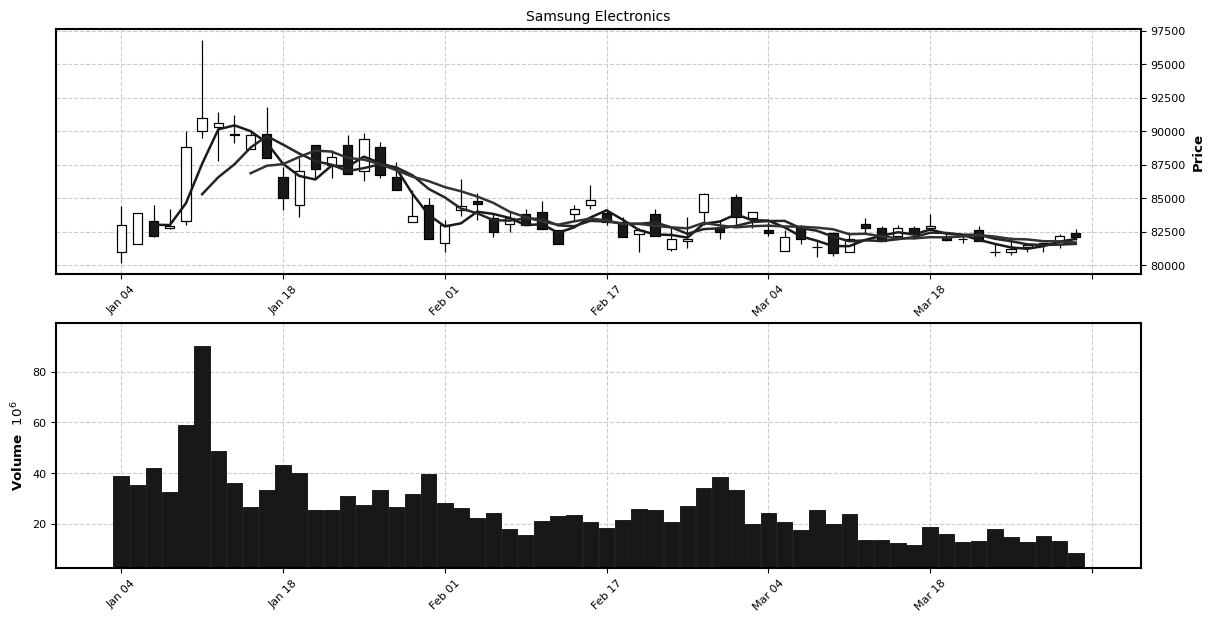

In [294]:
StockMpf_Classic(SSE,'Samsung Electronics')